In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_csv('./project_data/spam.csv', delimiter='\t',header=None)
df = pd.read_csv('./project_data/sms_spam.csv',delimiter=',',encoding='UTF-8')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.iloc[:,:2]

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.iloc[:,0]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5569    spam
5570     ham
5571     ham
5572     ham
5573     ham
Name: type, Length: 5574, dtype: object

In [4]:
df.type

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5569    spam
5570     ham
5571     ham
5572     ham
5573     ham
Name: type, Length: 5574, dtype: object

In [5]:
df.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

### Logistic_Regression

In [8]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df.text,df.type,test_size=0.2,random_state = 0)

le = LabelEncoder()

Y_train = le.fit_transform(y_train)

Y_test = le.fit_transform(y_test)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

X_test = vectorizer.transform(X_test_raw)
predictions = classifier.predict(X_test)
#print(predictions)
print ('Accuracy is {}'.format(classifier.score(X_test, Y_test)))

y_pred = pd.DataFrame(predictions)
print('MSE: {}'.format(mean_squared_error(Y_test, y_pred)))
      
comat = confusion_matrix(Y_test, y_pred)

print('confusion matrix:\n {}'.format(comat))

print(classification_report(Y_test, y_pred, target_names=['ham', 'spam']))

Accuracy is 0.9641255605381166
MSE: 0.03587443946188341
confusion matrix:
 [[948   2]
 [ 38 127]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       950
        spam       0.98      0.77      0.86       165

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115



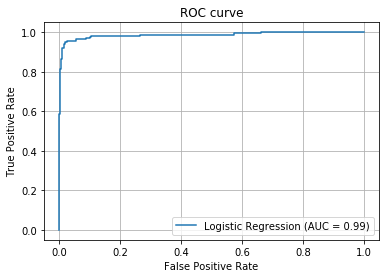

In [9]:
y_predicted_logistic = classifier.predict_proba(X_test)[:, 1]

fpr_logistic, tpr_logistic, thresholds_logistic = metrics.roc_curve(Y_test, y_predicted_logistic)

auc_logistic = metrics.auc(fpr_logistic, tpr_logistic)

plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %.2f)'%auc_logistic)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Using the cross-validation

## Since I changed the scikit-learn to use the cross-validation, if you implement the following code, please change your _validation.py (sklearn/model_selection/_validation.py) to _validation.py I provided.

In [10]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression 

In [11]:
X_row = df.text.values.tolist()
y_row = df.type.values.tolist()

In [12]:
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(X_row)

In [13]:
le = LabelEncoder()

label = le.fit_transform(y_row)

In [14]:
print(y_row[:10])
print(label[:10])

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']
[0 0 1 0 0 1 0 0 1 1]


In [13]:
logreg = LogisticRegression()

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

In [15]:
scores = cross_val_score(logreg, data, label, cv=kfold)

print("Cross-validation scores: {}".format(scores["results"]))
print("Average cross-validation score: {}".format(scores["results"].mean()))
print("MSE: {}".format(scores["mse"]))
print("Average MSE: {}".format(scores["mse"].mean()))

Cross-validation scores: [0.96681614 0.967713   0.95426009 0.96591928 0.96409336]
Average cross-validation score: 0.9637603754900935
MSE: [0.03318386 0.032287   0.04573991 0.03408072 0.03590664]
Average MSE: 0.03623962450990653


In [16]:
for i in range(len(scores["conf"])):
    print("Confusion matrix" + str(i+1) + ":\n{}".format(scores["conf"][i]))

Confusion matrix1:
[[965   1]
 [ 36 113]]
Confusion matrix2:
[[965   1]
 [ 35 114]]
Confusion matrix3:
[[964   1]
 [ 50 100]]
Confusion matrix4:
[[963   2]
 [ 36 114]]
Confusion matrix5:
[[964   1]
 [ 39 110]]


In [17]:
for i in range(len(scores["class_report"])):
    report = pd.DataFrame(scores["class_report"][i])
    report = report.rename(columns={'0': 'ham', '1': 'spam'})
    print("Classification Report" + str(i+1) + ":\n{}\n".format(report))

Classification Report1:
                  ham        spam  accuracy    macro avg  weighted avg
precision    0.964036    0.991228  0.966816     0.977632      0.967670
recall       0.998965    0.758389  0.966816     0.878677      0.966816
f1-score     0.981190    0.859316  0.966816     0.920253      0.964903
support    966.000000  149.000000  0.966816  1115.000000   1115.000000

Classification Report2:
                  ham        spam  accuracy    macro avg  weighted avg
precision    0.965000    0.991304  0.967713     0.978152      0.968515
recall       0.998965    0.765101  0.967713     0.882033      0.967713
f1-score     0.981689    0.863636  0.967713     0.922663      0.965913
support    966.000000  149.000000  0.967713  1115.000000   1115.000000

Classification Report3:
                  ham        spam  accuracy    macro avg  weighted avg
precision    0.950690    0.990099   0.95426     0.970395      0.955992
recall       0.998964    0.666667   0.95426     0.832815      0.954260
f1-

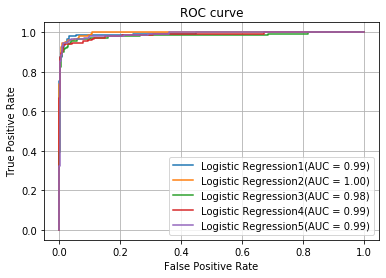

In [18]:
for i in range(len(scores["prob"])):
    # calculate FPR, TPR
    fpr_logistic, tpr_logistic, thresholds_logistic = metrics.roc_curve(scores["prob"][i][1], scores["prob"][i][0][:,1])

    # calculate AUC
    auc_logistic = metrics.auc(fpr_logistic, tpr_logistic)

    # plot ROC curves
    plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression' + str(i+1) + '(AUC = %.2f)'%auc_logistic)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    #plt.show()
    plt.savefig('ROC_logistic.png')